In [42]:
pip install pytrends matplotlib pandas seaborn plotly  

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

Setup pytrends library and Keyword define

In [44]:
pytrends = TrendReq(hl = 'en-US' , tz = 360)
keyword = "jobs"

Data Request

In [45]:
pytrends.build_payload([keyword] , cat = 0 , timeframe = 'today 12-m', geo='', gprop ='')

# country wise interest

In [46]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by = keyword, ascending = False).head(15)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9604\3961494898.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




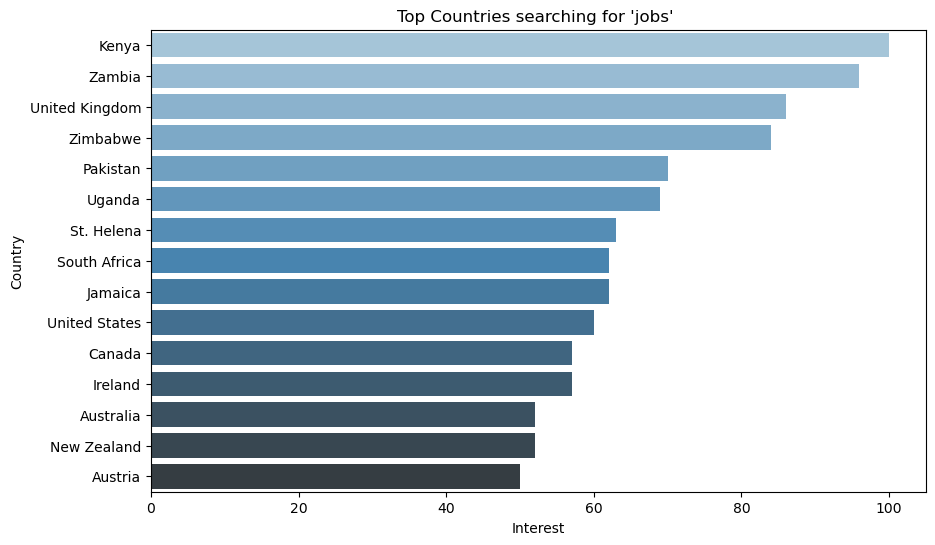

In [47]:
plt.figure(figsize = (10,6) )
sns.barplot(x = region_data[keyword], y = region_data.index,palette = "Blues_d")
plt.title(f"Top Countries searching for '{keyword}' ")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

# world map

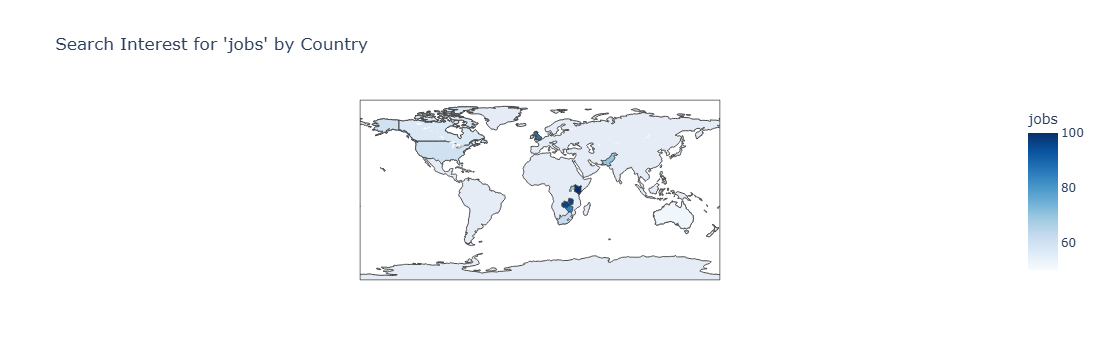

In [48]:
region_data = region_data.reset_index()
fig = px.choropleth(
    region_data,
    locations='geoName',
    locationmode='country names',
    color=keyword,
    title=f"Search Interest for '{keyword}' by Country",
    color_continuous_scale='Blues'
)
fig.show()


# Time wise interest

In [49]:
import pandas as pd

# Opt-in to future pandas downcasting behavior to suppress warning
pd.set_option('future.no_silent_downcasting', True)

# Get trend data over time
time_df = pytrends.interest_over_time()


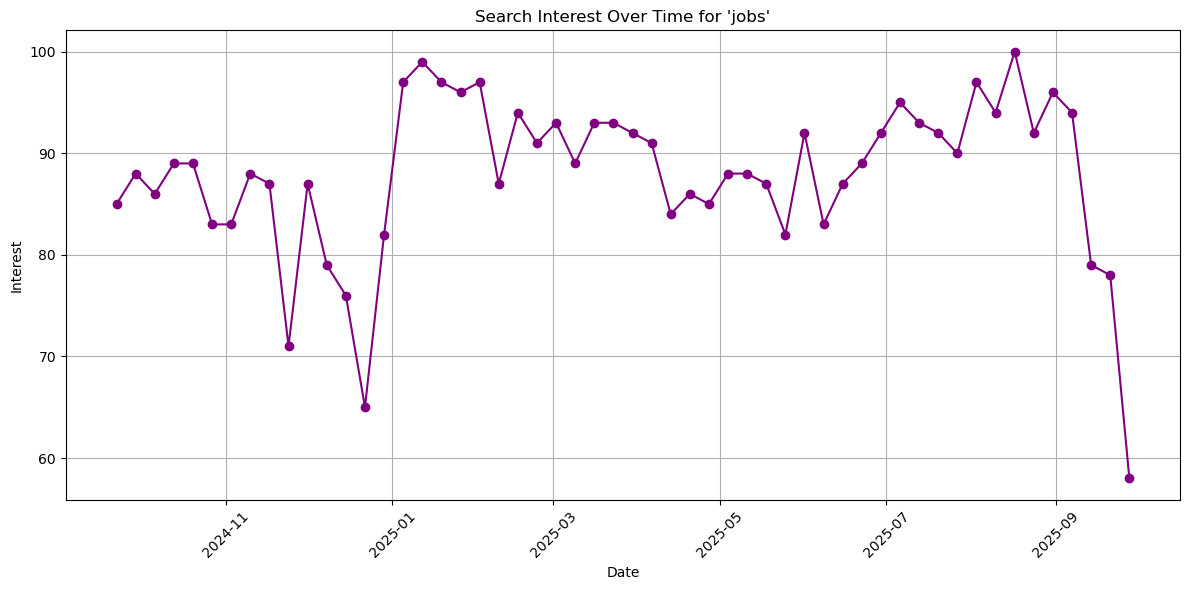

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(
    time_df.index,
    time_df[keyword],
    marker='o',
    color='purple',
    linestyle='-'
)
plt.title(f"Search Interest Over Time for '{keyword}'")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Ensures labels and title fit well
plt.show()


# Multiple Keywords compare

In [53]:

kw_list = ["jobs", "higher study ", "unemployed"]
pytrends.build_payload(kw_list, cat=0,timeframe = 'today 12-m' ,geo='' , gprop='')

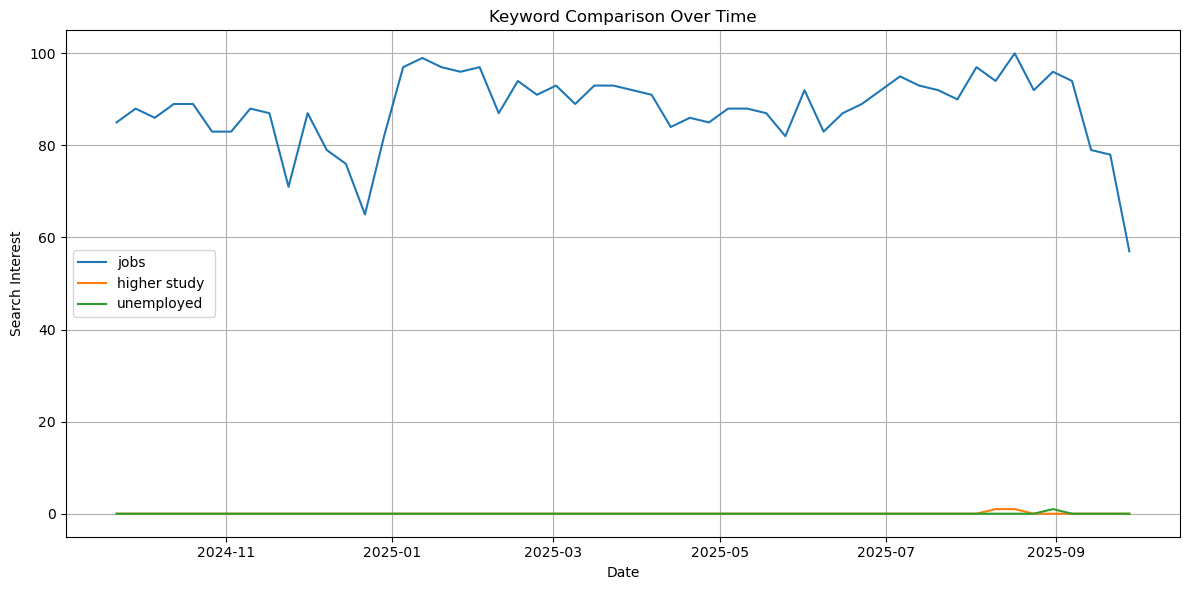

In [54]:
compare_df = pytrends.interest_over_time()

plt.figure(figsize=(12,6))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], label=kw)

plt.title("Keyword Comparison Over Time")
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
